In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
ds1 = anscombe[anscombe['dataset'] == 'I']
ds2 = anscombe[anscombe['dataset'] == 'II']
ds3 = anscombe[anscombe['dataset'] == 'III']
ds4 = anscombe[anscombe['dataset'] == 'IV']

### All anscombe dataset have the same count, mean and std

In [4]:
print(ds1.describe().loc[['count', 'mean', 'std']])
print(ds2.describe().loc[['count', 'mean', 'std']])
print(ds3.describe().loc[['count', 'mean', 'std']])
print(ds4.describe().loc[['count', 'mean', 'std']])

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579


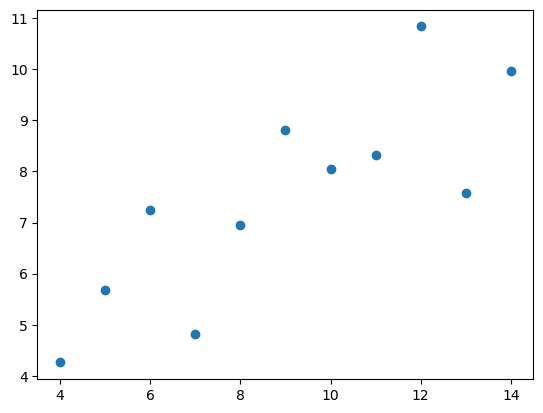

In [5]:
plt.plot(ds1['x'], ds1['y'], 'o')

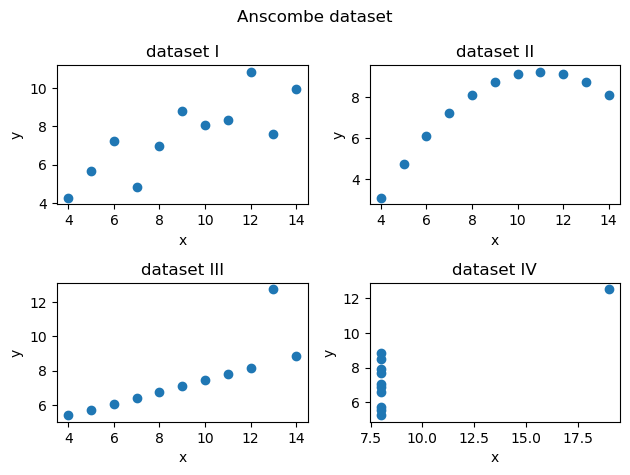

In [6]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.plot(ds1['x'], ds1['y'], 'o')
axes2.plot(ds2['x'], ds2['y'], 'o')
axes3.plot(ds3['x'], ds3['y'], 'o')
axes4.plot(ds4['x'], ds4['y'], 'o')

axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes3.set_xlabel('x')
axes3.set_ylabel('y')
axes4.set_xlabel('x')
axes4.set_ylabel('y')

axes1.set_title('dataset I')
axes2.set_title('dataset II')
axes3.set_title('dataset III')
axes4.set_title('dataset IV')

fig.suptitle('Anscombe dataset')
fig.tight_layout()

# Statistical Graphics

In [7]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Univariate
### Histograms

#### Frequency of continuous variable

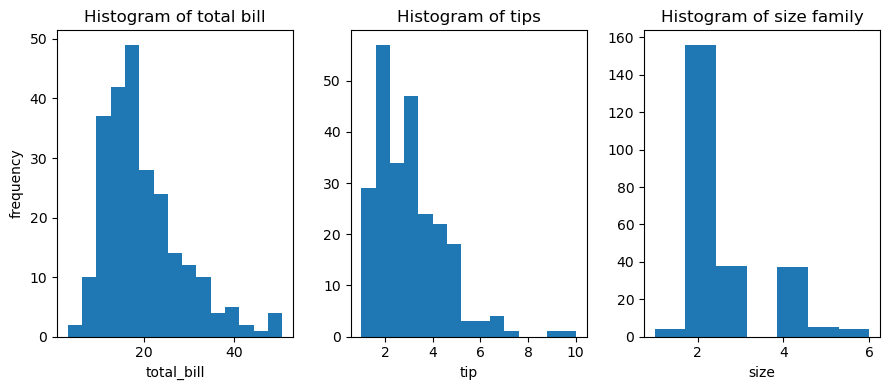

In [8]:
fig = plt.figure(figsize=(9, 4))

axes1 = fig.add_subplot(1,3,1)
axes1.hist(tips['total_bill'], bins=15)

axes2 = fig.add_subplot(1,3,2)
axes2.hist(tips['tip'], bins=15)

axes3 = fig.add_subplot(1,3,3)
axes3.hist(tips['size'], bins=7)

axes1.set_ylabel('frequency')
axes1.set_xlabel('total_bill')
axes1.set_title('Histogram of total bill')

axes2.set_title('Histogram of tips')
axes2.set_xlabel('tip')

axes3.set_title('Histogram of size family')
axes3.set_xlabel('size')
fig.tight_layout()

## Bivariate
### Scatterplot


#### Continuous against continuous variable

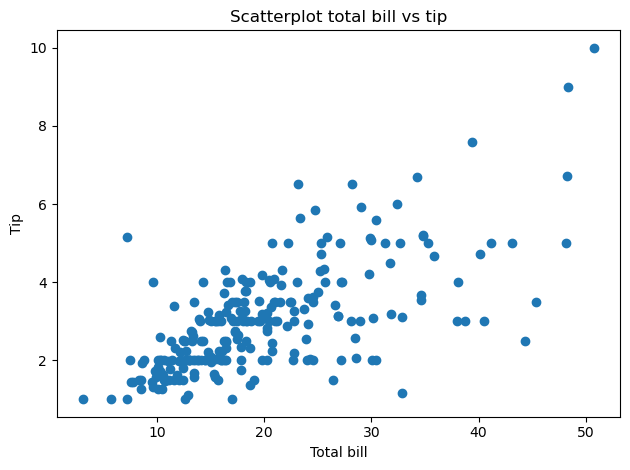

In [9]:
scatter_fig = plt.figure()

axes1 = scatter_fig.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])

axes1.set_title('Scatterplot total bill vs tip')
axes1.set_xlabel('Total bill')
axes1.set_ylabel('Tip')

scatter_fig.tight_layout()

### Boxplot

#### Discret agaisnt continuous variables

Text(0, 0.5, 'Tip')

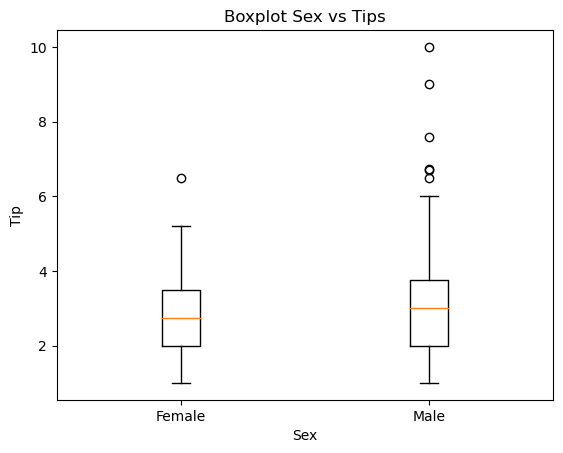

In [10]:
boxp_fig = plt.figure()
axes1 = boxp_fig.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
              labels=['Female', 'Male'])
axes1.set_title('Boxplot Sex vs Tips')
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')

## Multivariate Data
---

In [11]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
tips['sex_color'] = tips['sex'].apply(recode_sex)

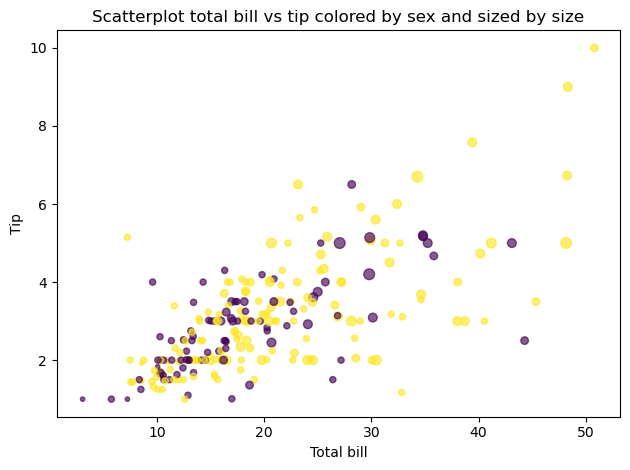

In [12]:
scatter_fig = plt.figure()

axes1 = scatter_fig.add_subplot(1,1,1)
axes1.scatter(x=tips['total_bill'], 
              y=tips['tip'], 
              s=tips['size']*10,   #muito difícil ver a diferença em tamanhos
              c=tips['sex_color'], 
              alpha=0.64)

axes1.set_title('Scatterplot total bill vs tip colored by sex and sized by size')
axes1.set_xlabel('Total bill')
axes1.set_ylabel('Tip')

scatter_fig.tight_layout()

# Seaborn

## Univariate
---

### Histograms

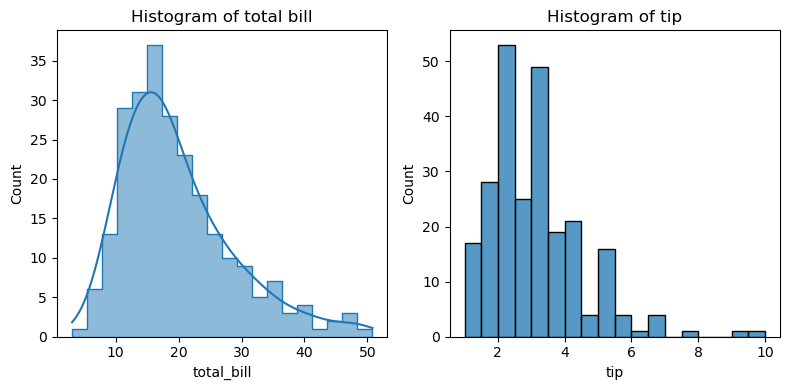

In [13]:
hist, ax = plt.subplots(1,2, figsize=(8,4))
sns.histplot(tips['total_bill'], 
             ax=ax[0], 
             kde=True, 
             bins=20, 
             element='step')

sns.histplot(tips['tip'], ax=ax[1])

ax[0].set_title('Histogram of total bill')
ax[1].set_title('Histogram of tip')
hist.tight_layout()

### Count plot

<AxesSubplot:xlabel='day', ylabel='count'>

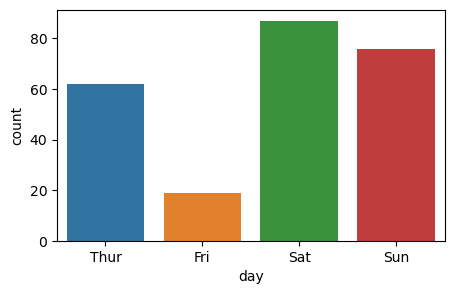

In [14]:
count, ax = plt.subplots(figsize=(5,3))

sns.countplot(x=tips['day'])

## Bivariate
---

### Scatterplot or regplot

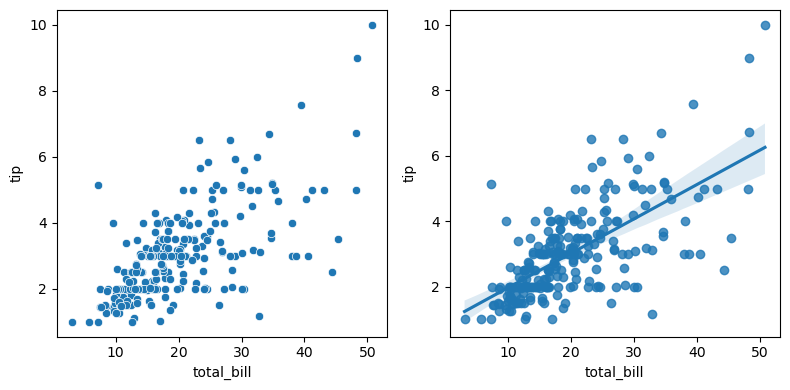

In [15]:
scatter, ax = plt.subplots(1,2, figsize=(8,4))
sns.scatterplot(x=tips['total_bill'], 
                y=tips['tip'], 
                ax=ax[0])
sns.regplot(x=tips['total_bill'], 
            y=tips['tip'], 
            ax=ax[1])
scatter.tight_layout()

### Joint plot / hexbin

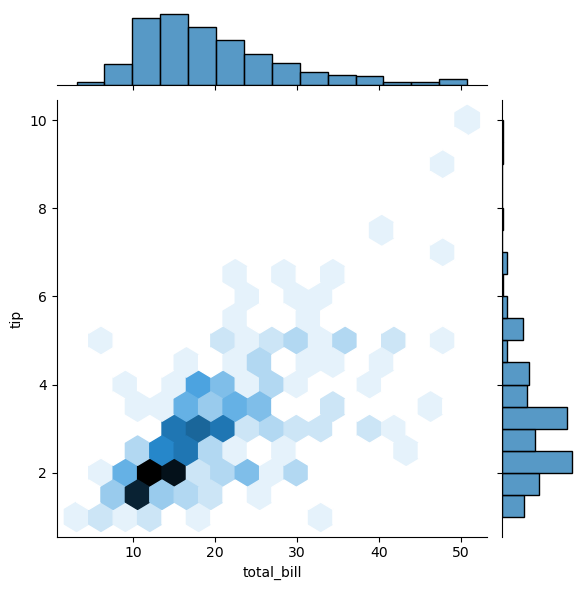

In [16]:
# scatterplot plus histograms
hexbin = sns.jointplot(x=tips['total_bill'],
                      y=tips['tip'],
                      kind='hex')

### Density plot

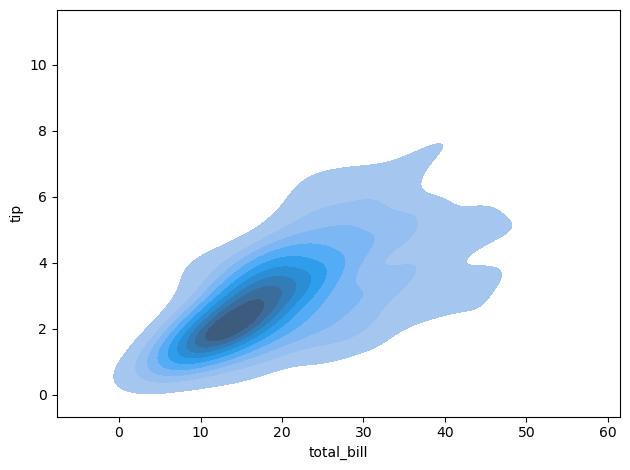

In [17]:
kde, ax = plt.subplots()
sns.kdeplot(x=tips['total_bill'],
            y=tips['tip'],
            shade=True)
kde.tight_layout()

### Bar plot
Qualitative vs quantitative

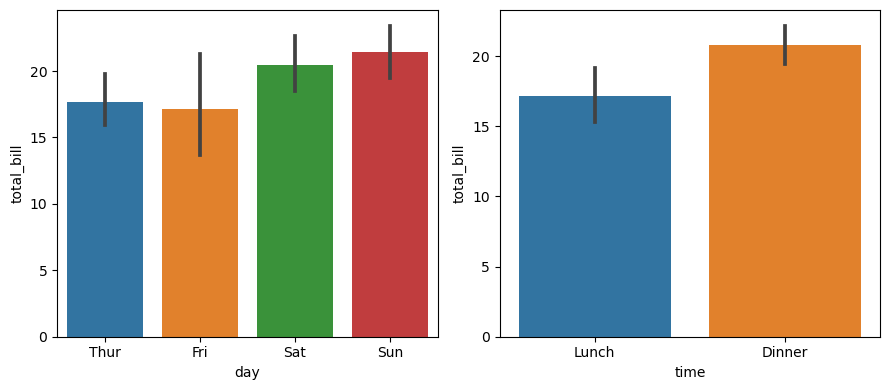

In [18]:
bar, ax = plt.subplots(1,2, figsize=(9,4))
sns.barplot(x=tips['day'],
            y=tips['total_bill'],
            ax=ax[0])

sns.barplot(data=tips,
            x='time',
            y='total_bill',
            ax=ax[1])
bar.tight_layout()

<AxesSubplot:xlabel='time', ylabel='total_bill'>

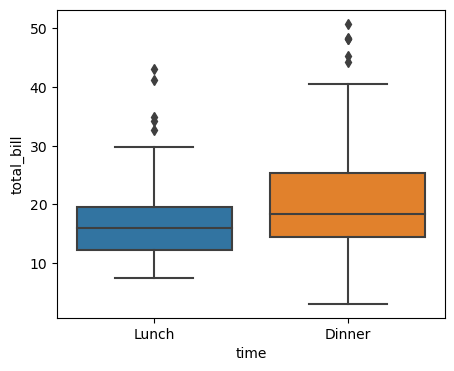

In [19]:
boxplot, ax = plt.subplots(figsize=(5,4))
sns.boxplot(data=tips,
            x='time',
            y='total_bill')


### Pairplot

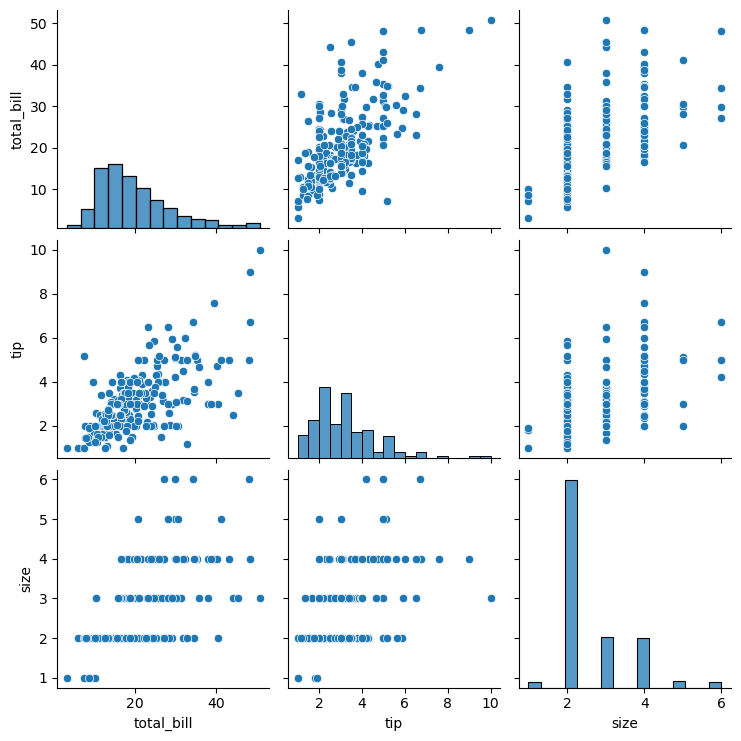

In [20]:
fig = sns.pairplot(tips)

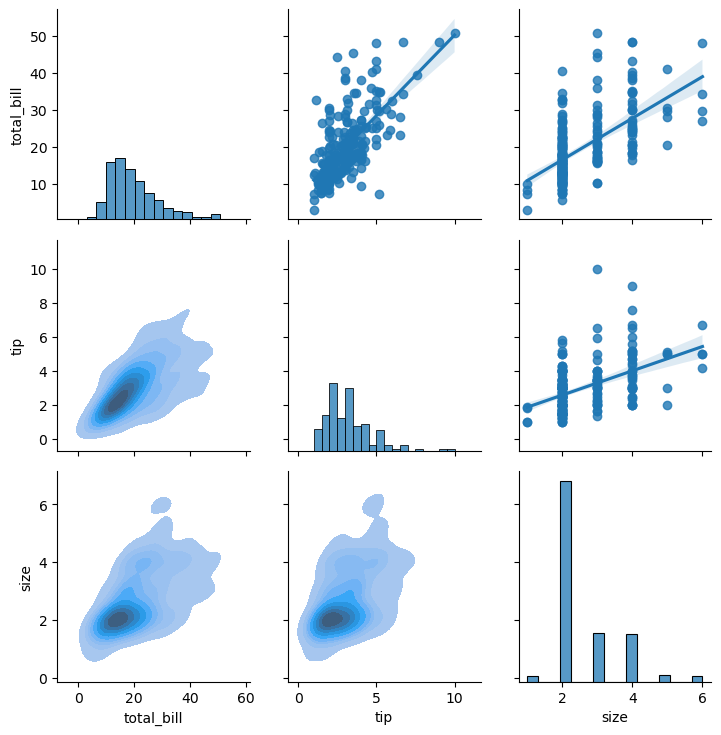

In [21]:
pair_grid = sns.PairGrid(tips)

pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot, shade=True)
pair_grid = pair_grid.map_diag(sns.histplot)

## Multivariate data
---

### Colors

Text(0.5, 1.0, 'Violin plot of time vs total bill divided by sex')

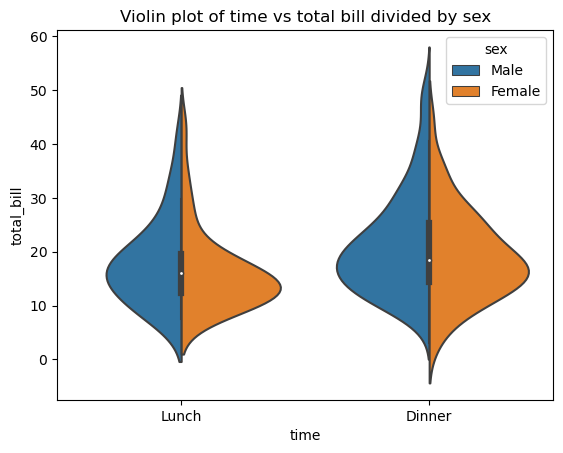

In [22]:
violin, ax = plt.subplots()
sns.violinplot(data=tips,
               x='time',
               y='total_bill',
               hue='sex',
               split=True)
ax.set_title('Violin plot of time vs total bill divided by sex')

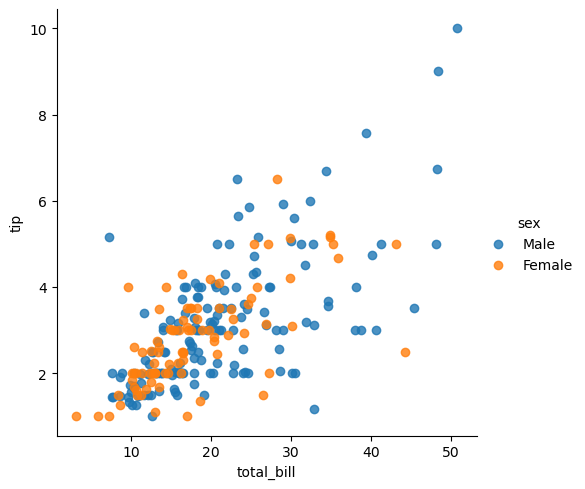

In [23]:
fig = sns.lmplot(data=tips,
                 x='total_bill',y='tip',
                 hue='sex',
                 fit_reg=False)

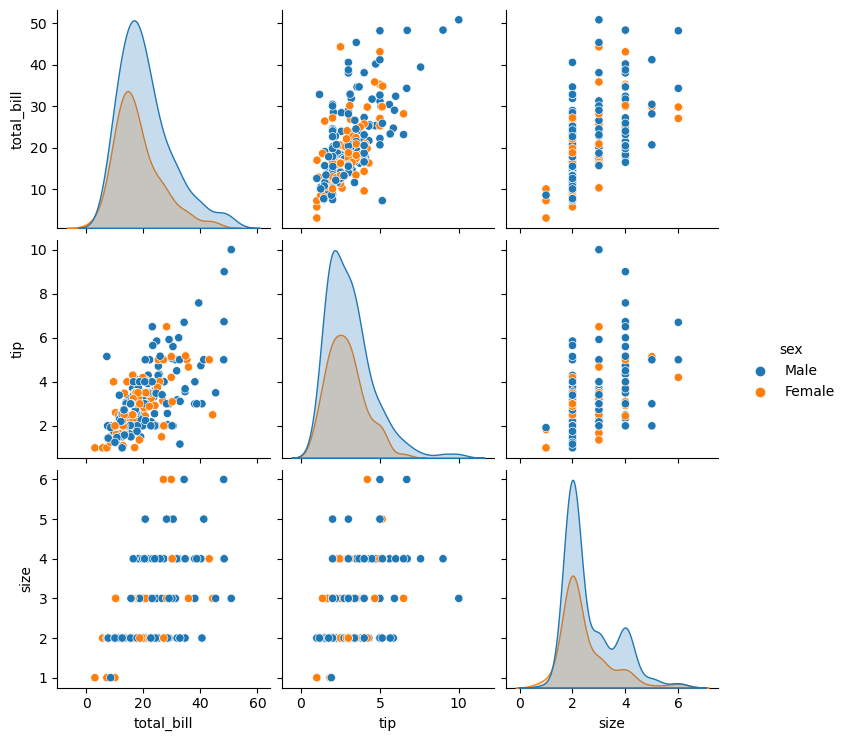

In [24]:
fig = sns.pairplot(tips, hue='sex')

### Facets
Vários plots de uma variável categórica

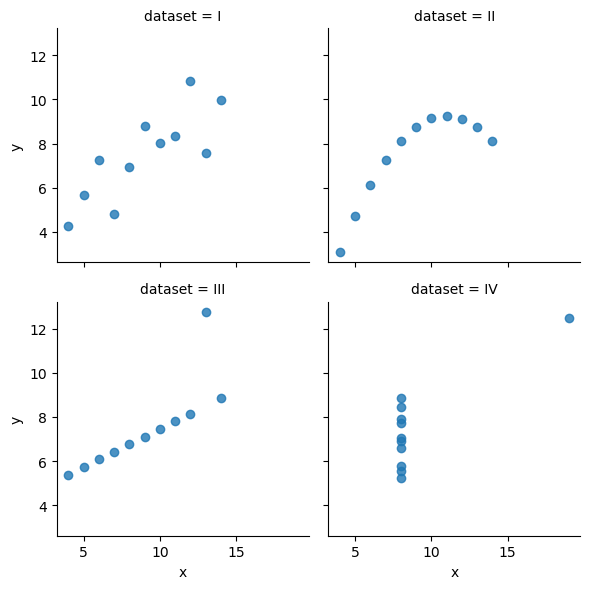

In [25]:
# por lmplot criar uma figure-level, podemos passar o parâmetro col
anscombe_data = sns.lmplot(data=anscombe,
                           x='x',y='y',
                           fit_reg=False,
                           col='dataset',col_wrap=2,
                           height=3)

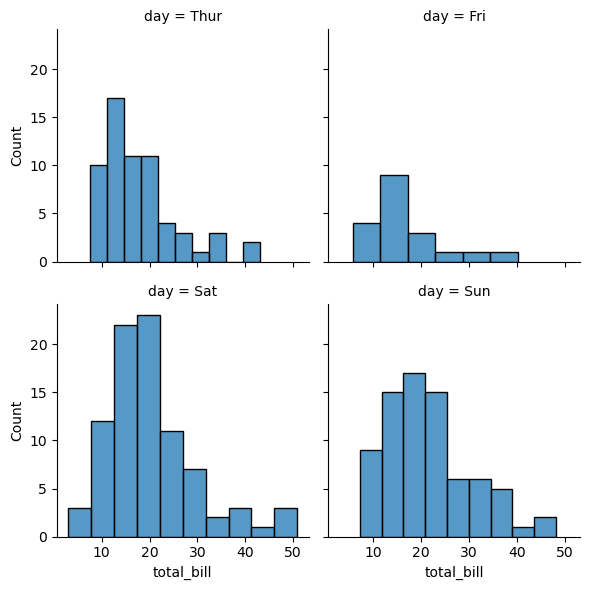

In [26]:
# por histplot ser axes-level, precisamos criar um FacetGrid para dividirmos pela variável categórica

facet = sns.FacetGrid(tips, col='day', col_wrap=2)
facet.map(sns.histplot, 'total_bill')

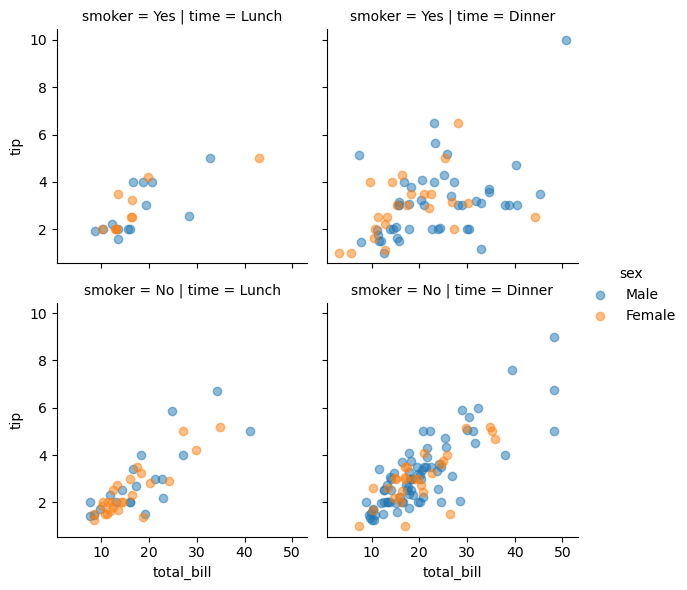

In [27]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip', alpha=0.5)
facet.add_legend()

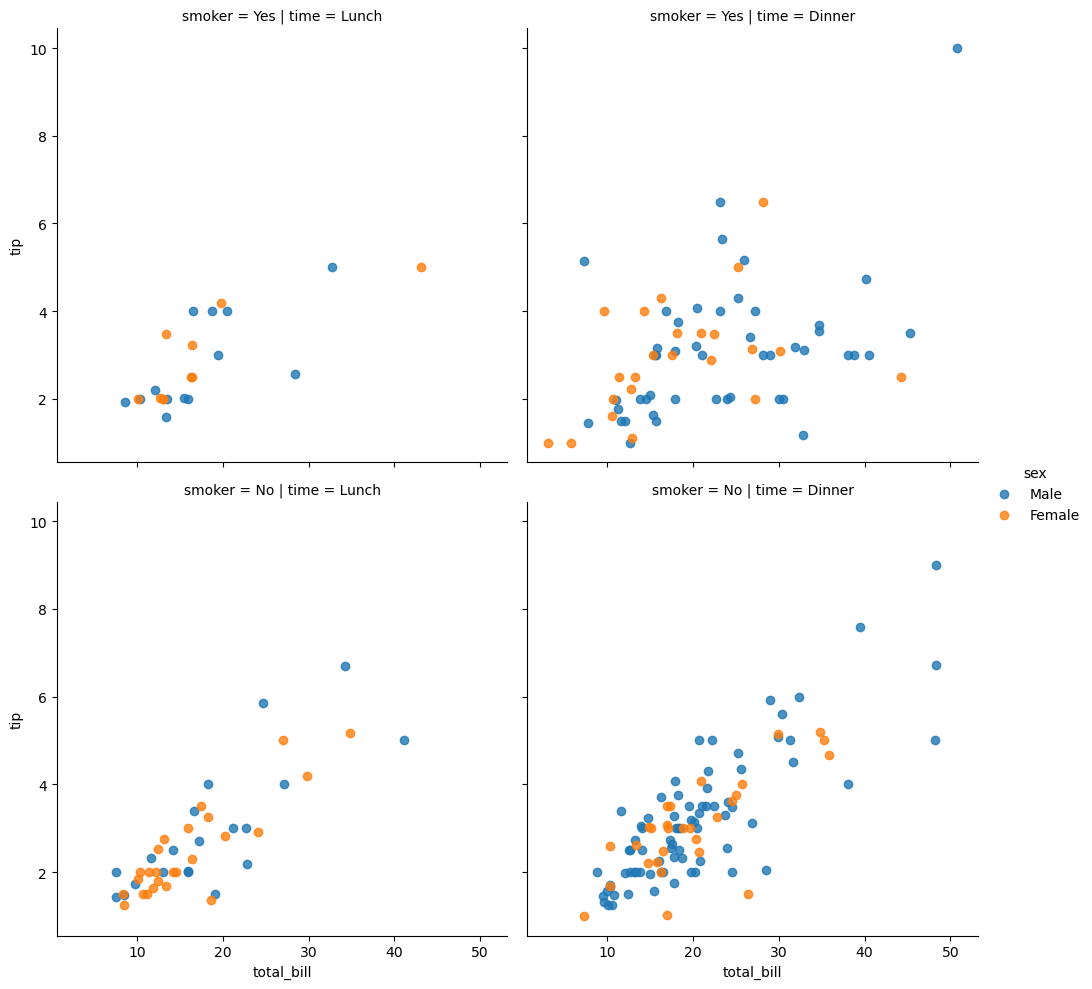

In [28]:
# Mesmo gráfico que o anterior
fig = sns.lmplot(data=tips,
                 x='total_bill', y='tip',
                 col='time', row='smoker', hue='sex',
                 fit_reg=False)

## Pandas Objects

Text(0.5, 0, 'total_bill')

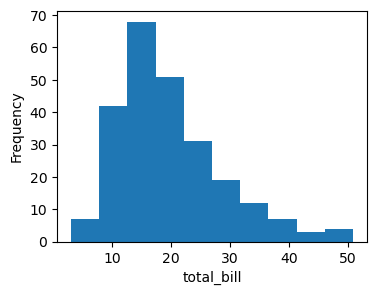

In [29]:
fig, ax = plt.subplots(figsize=(4,3))
ax = tips['total_bill'].plot.hist()
ax.set_xlabel('total_bill')

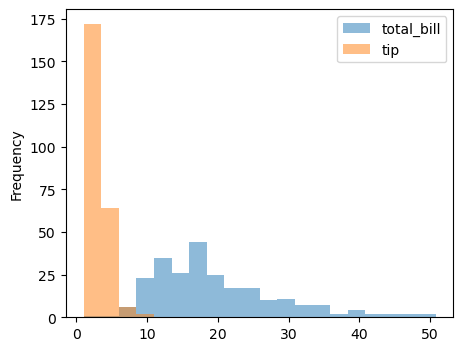

In [30]:
fix, ax = plt.subplots(figsize=(5,4))
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

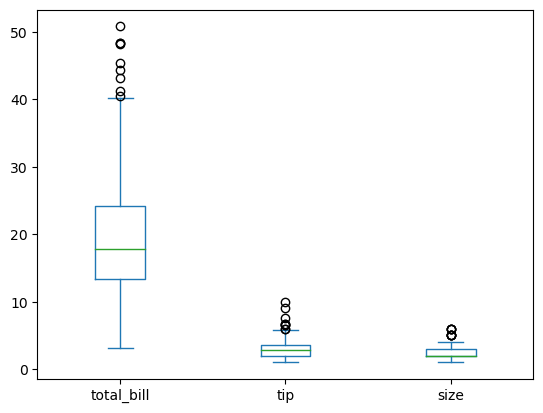

In [31]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

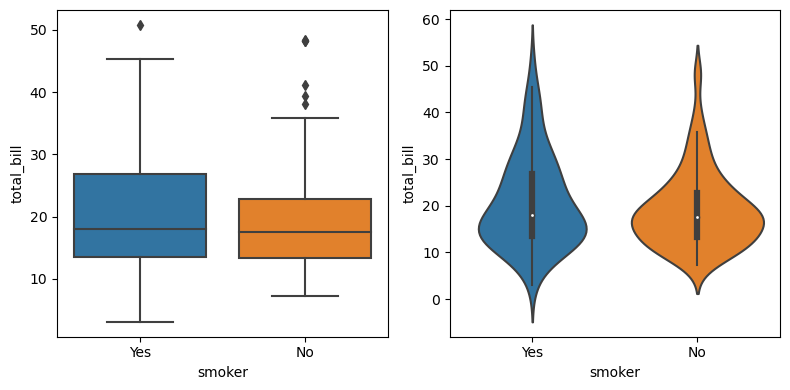

In [44]:
fig, ax =plt.subplots(1,2, figsize=(8,4))
sns.violinplot(data=tips,
                    x='smoker',y='total_bill',
                    ax=ax[1])
sns.boxplot(data=tips,
                 x='smoker',y='total_bill',
                 ax=ax[0])
fig.tight_layout()